In [2]:
import numpy as np
import pandas as pd

In [3]:
theoffice = pd.read_csv('https://raw.githubusercontent.com/fabriziocominetti/the-office/main/data/the-office_lines.csv')

In [4]:
theoffice.shape

(58721, 5)

In [5]:
theoffice.head()

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1


In [6]:
theoffice[theoffice.isna()].sum()

Unnamed: 0        0.0
Character           0
Line                0
Season            0.0
Episode_Number    0.0
dtype: object

In [7]:
theoffice1 = theoffice[theoffice['Season'] == 1]

In [8]:
theoffice1.shape

(1986, 5)

In [13]:
theoffice1['Count'] = theoffice1['Line'].str.split().str.len()

C:\Users\GRMITALY\AppData\Local\Temp/ipykernel_11152/3007427104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theoffice1['Count'] = theoffice1['Line'].str.split().str.len()


In [14]:
theoffice1.head()

,Unnamed: 0,Character,Line,Season,Episode_Number,Count
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1,14
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1,9
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1,14
3,3,Jim,"Actually, you called me in here, but yeah.",1,1,8
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1,10


In [27]:
s1_grouped = theoffice1.groupby('Character', as_index=False)['Count'].sum()

In [28]:
s1_grouped.head()

,Character,Count
0,Angela,253
1,Darryl,111
2,Documentary Crew Member,54
3,Dwight,3697
4,Everybody,35


In [29]:
s1_grouped.shape

(32, 2)

In [31]:
s1_grouped.sort_values(by='Count', ascending=False)

,Character,Count
15,Michael,12548
3,Dwight,3697
6,Jim,3005
21,Pam,1476
18,Mr. Brown,586
19,Oscar,427
7,Katy,385
5,Jan,350
24,Ryan,330
0,Angela,253


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
ordered = s1_grouped.sort_values(by='Count', ascending=False)[:5]

In [60]:
sns.set_theme(style='whitegrid')

<AxesSubplot:xlabel='Count', ylabel='Character'>

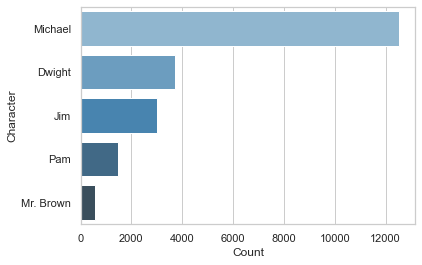

In [63]:
sns.barplot(x='Count', y='Character', data=ordered, palette='Blues_d')